# Labo 8
Opérations morphologiques binaires et en niveaux de gris

In [1]:
from skimage import data, morphology
import matplotlib.pyplot as plt
import numpy as np

## Exercice 1
Aller chercher les contours dans une image à l'aide d'une érosion

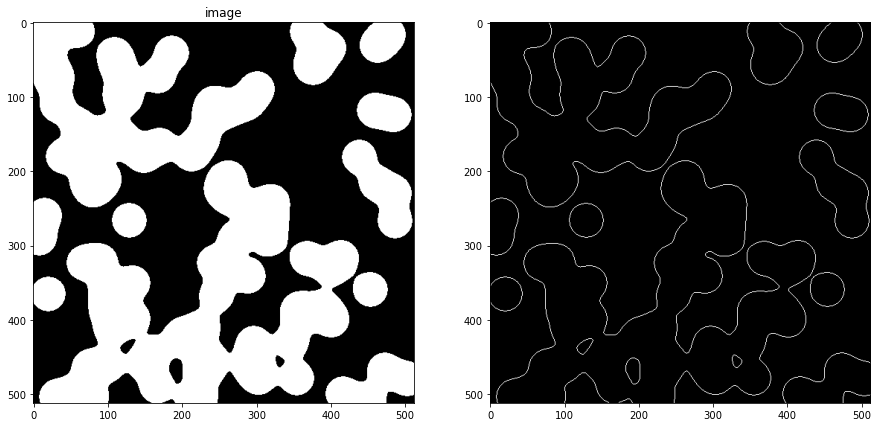

In [5]:
img = data.binary_blobs()

plt.figure(figsize=(15,15))

plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('image')

erosion = morphology.binary_erosion(img)

erosion = erosion ^ img
plt.subplot(122);plt.imshow(erosion, cmap="gray");
plt.show()

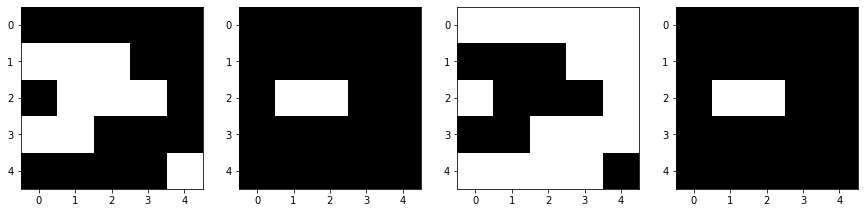

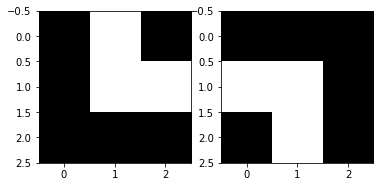

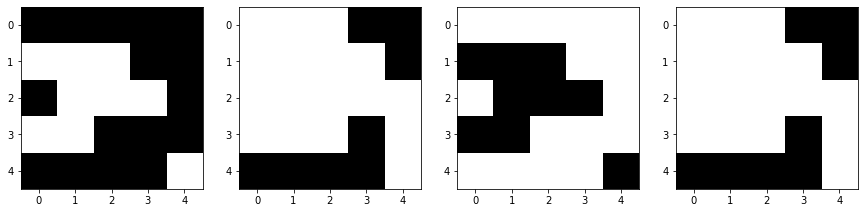

In [34]:
# exercices pour comprendre la relation entre dilation et erosion

bin = np.array([
    [0,0,0,0,0],
    [1,1,1,0,0],
    [0,1,1,1,0],
    [1,1,0,0,0],
    [0,0,0,0,1]
])

h = np.array([
    [0,1,0],
    [0,1,1],
    [0,0,0]
])

hb = np.array([
    [0,0,0],
    [1,1,0],
    [0,1,0]
])

ero = morphology.binary_erosion(bin, h)
inv = np.logical_not(bin)
dil = morphology.binary_dilation(inv, hb)



plt.figure(figsize=(15,15))

plt.subplot(141);plt.imshow(bin, cmap="gray"); 
plt.subplot(142);plt.imshow(ero, cmap="gray");
plt.subplot(143);plt.imshow(inv, cmap="gray");
plt.subplot(144);plt.imshow(~dil, cmap="gray");

plt.show()

plt.subplot(121);plt.imshow(h, cmap="gray")
plt.subplot(122);plt.imshow(hb, cmap="gray")

plt.show()

dil = morphology.binary_dilation(bin, h)
inv = np.logical_not(bin)
ero = morphology.binary_erosion(inv, hb)

plt.figure(figsize=(15,15))

plt.subplot(141);plt.imshow(bin, cmap="gray"); 
plt.subplot(142);plt.imshow(dil, cmap="gray");
plt.subplot(143);plt.imshow(inv, cmap="gray");
plt.subplot(144);plt.imshow(~ero, cmap="gray");

plt.show()


## Exercice 2
Faire une dilatation géodésique avec un masque de sorte à reconstruire des blobs à partir d'un point (seed)

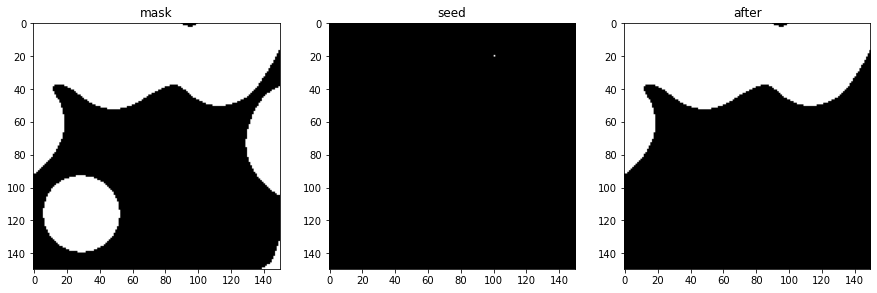

In [43]:
mask = img[150:300, 100:250]
seed = np.zeros_like(mask)
seed[20, 100] = 1
h = [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]]

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(mask, cmap='gray'); plt.title('mask')
plt.subplot(132); plt.imshow(seed, cmap='gray'); plt.title('seed')

prev = None
curr = seed.copy()
while np.not_equal(prev,curr).any() :
     prev = curr.copy()
     curr = np.logical_and(mask, morphology.binary_dilation(curr, h))
     
plt.subplot(133); plt.imshow(curr, cmap="gray"); plt.title("after")

plt.show()

## Exercice 3
Faire une fermeture avec notre image afin de retirer les trous

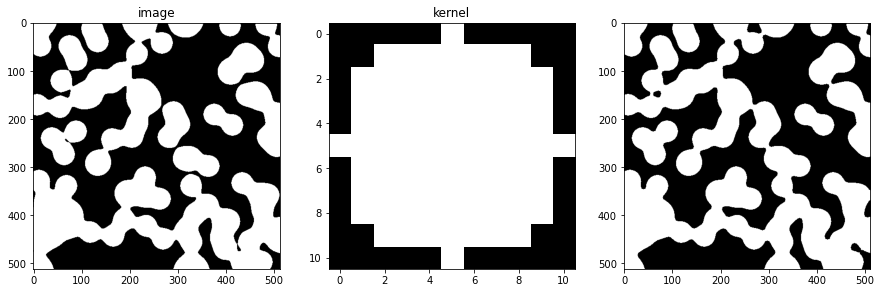

In [49]:
img = data.binary_blobs()
h = morphology.disk(5)

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('image')

plt.subplot(132); plt.imshow(h, cmap='gray'); plt.title('kernel')

close = morphology.binary_closing(img, h)

plt.subplot(133); plt.imshow(close,cmap="gray")

plt.show()

## Exercice 4
Faire une ouverture sur différent niveau de gris pour retirer la majorité des petites étoiles

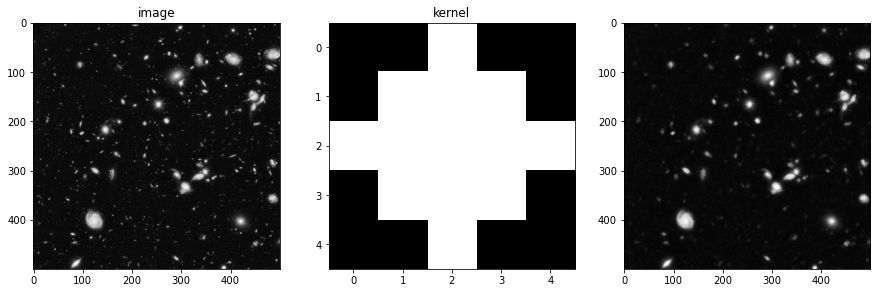

In [52]:
img = data.hubble_deep_field().mean(axis=2)[:500, :500]
h = morphology.diamond(2)

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('image')

plt.subplot(132); plt.imshow(h, cmap='gray'); plt.title('kernel')

opening = morphology.opening(img, h)

plt.subplot(133); plt.imshow(opening, cmap='gray')

plt.show()

## Exercice 5
Appliquer un filtre Top-Hat afin de récupérer les étoiles retirer de l'image suite à l'ouverture.
> https://scikit-image.org/docs/dev/auto_examples/filters/plot_tophat.html

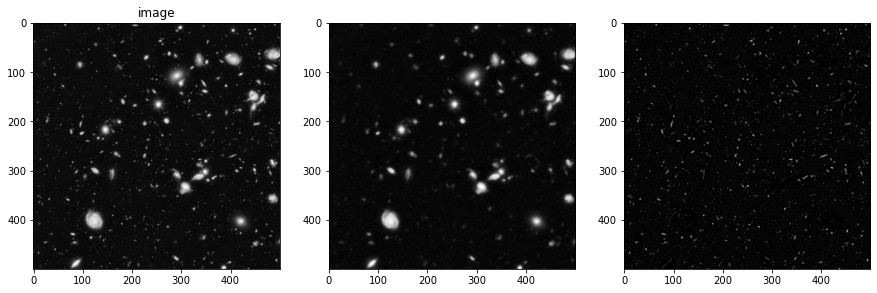

In [54]:
img = data.hubble_deep_field().mean(axis=2)[:500, :500]

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('image')

h =  morphology.disk(2)

open = morphology.opening(img, h)

top = morphology.white_tophat(img, h)

plt.subplot(132); plt.imshow(open, cmap="gray")
plt.subplot(133); plt.imshow(top, cmap="gray")
plt.show()